In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/makam/Desktop/Capstone Project/diabetic_data.csv')
data1 = pd.read_csv('C:/Users/makam/Desktop/Capstone Project/diabetic_data.csv')

drugs = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
drug_d = pd.DataFrame()
for x in drugs:
    del data1[x]
    drug_d[x]=data[x]
    mapping_dict={x:{'No':0,'Down':1,'Steady':1,'Up':1}}
    drug_d.replace(mapping_dict,inplace=True)
    
drug_d['encounter_id']=data['encounter_id']
ids = data['encounter_id']
ids1 = pd.DataFrame(ids)
ids1['key'] = ids1.index
drug_dt=drug_d.T
insulin_data = drug_d['insulin']
drug_dt.drop(['insulin'],inplace=True)
cols = drug_dt.columns.values.tolist()
drug_dt.drop(['encounter_id'],inplace=True)
no_combo=[]
combo=[]
for x in cols:
    if(drug_dt[x].sum()==0):
        no_combo.append(x)
    else:
        combo.append(x)
combo1 = pd.DataFrame(combo)
combo1.rename(columns={0:'key'},inplace=True)
combo2 = pd.merge(combo1,ids1,on='key',how='inner')
del combo2['key']
no_combo1 = pd.DataFrame(no_combo)
no_combo1.rename(columns={0:'key'},inplace=True)
no_combo2 = pd.merge(no_combo1,ids1,on='key',how='inner')
del no_combo2['key']
ins_data=pd.DataFrame(insulin_data,columns=['insulin'])
ins_data['encounter_id']=data['encounter_id']
combo3 = pd.merge(combo2,ins_data,on='encounter_id',how='inner')
no_combo3 = pd.merge(no_combo2,ins_data,on='encounter_id',how='inner')
no_diabetes = no_combo3[no_combo3['insulin']==0]
type1 = no_combo3[no_combo3['insulin']!=0]
type2 = combo3[combo3['insulin']==0]
t1t2 = combo3[combo3['insulin']!=0]
no_diabetes['treatment']=0
type1['treatment']=1
type2['treatment']=2
t1t2['treatment']=3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [24]:
diabetes = pd.merge(drug_d,data1,on='encounter_id',how='inner')
ttype = pd.concat([no_diabetes,type1,type2,t1t2])
del ttype['insulin']
diabetes = pd.merge(diabetes,ttype,on='encounter_id',how='inner')

In [25]:
diabetes.columns.values

array(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'encounter_id', 'max_glu_serum',
       'A1Cresult', 'change', 'diabetesMed', 'readmitted', 'treatment'],
      dtype=object)

# Evaluating efficiency of solo insulin based treatments

In [29]:
data = diabetes[diabetes['treatment']==1]

Text(0.5, 1.0, 'readmission VS. solo insulin treatment')

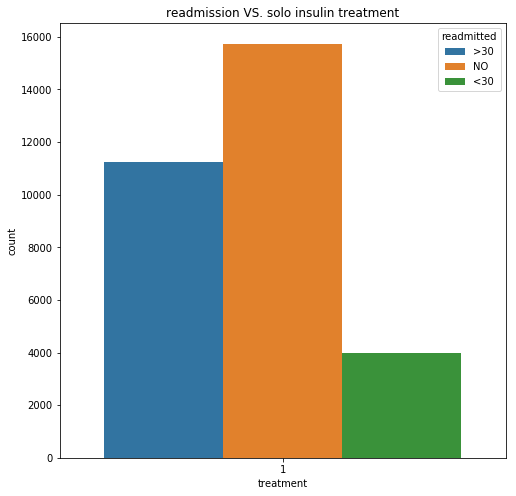

In [30]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x= data['treatment'], hue = data['readmitted']).set_title('readmission VS. solo insulin treatment')

In [31]:
x1 = len(data[data['readmitted']=='NO'])
x2 = len(data[data['readmitted']=='>30'])
y = len(data)

print('The efficiency of solo insulin treatment is',((x1+x2)/y)*100,'%')

The efficiency of solo insulin treatment is 87.08218956886807 %


# Evaluating efficiency of non-insulin based treatments

Text(0.5, 1.0, 'readmission VS. solo insulin treatment')

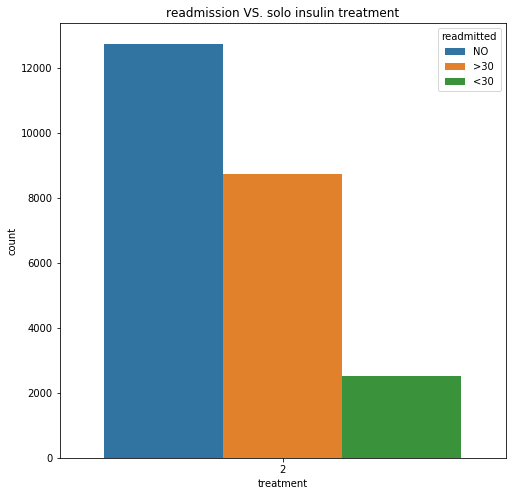

In [32]:
data = diabetes[diabetes['treatment']==2]
fig = plt.figure(figsize=(8,8))
sns.countplot(x= data['treatment'], hue = data['readmitted']).set_title('readmission VS. solo insulin treatment')

In [33]:
x1 = len(data[data['readmitted']=='NO'])
x2 = len(data[data['readmitted']=='>30'])
y = len(data)

print('The efficiency of non-insulin based treatment is',((x1+x2)/y)*100,'%')

The efficiency of non-insulin based treatment is 89.53294412010008 %


#  Evaluating efficiency of insulin+other drug based treatments

Text(0.5, 1.0, 'readmission VS. solo insulin treatment')

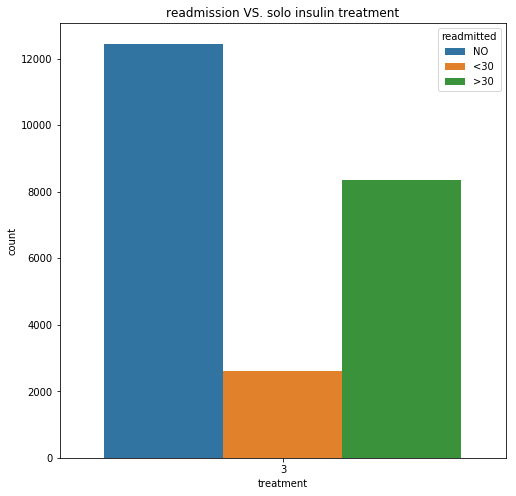

In [34]:
data = diabetes[diabetes['treatment']==3]
fig = plt.figure(figsize=(8,8))
sns.countplot(x= data['treatment'], hue = data['readmitted']).set_title('readmission VS. solo insulin treatment')

In [36]:
x1 = len(data[data['readmitted']=='NO'])
x2 = len(data[data['readmitted']=='>30'])
y = len(data)

print('The efficiency of insulin+other drug based treatment is',((x1+x2)/y)*100,'%')

The efficiency of insulin+other drug based treatment is 88.89315910837817 %
